### 任务描述

掌握EM算法的工作原理，利用EM算法对王者荣耀英雄进行聚类。

### 相关知识

**EM算法工作原理**

EM算法一般用于聚类，也就是无监督模型里面，因为无监督学习没有标签，EM算法可以先给无监督学习估计一个隐状态（即标签），有了标签，算法模型就可以转换成有监督学习，这时就可以用极大似然估计法求解出模型最优参数。其中估计隐状态流程应为EM算法的E步，后面用极大似然估计为M步。

**在sklearn中创建GMM模型**

本案例采用GMM高斯混合模型，因此将介绍下如何在sklearn中创建GMM聚类：

gmm = GaussianMixture(n_components=1, covariance_type='full', max_iter=100)

看一下这几个参数：

1.n_components：即高斯混合模型的个数，也就是我们要聚类的个数，默认值为 1。如果你不指定 n_components，最终的聚类结果都会为同一个值。

2.covariance_type：代表协方差类型。一个高斯混合模型的分布是由均值向量和协方差矩阵决定的，所以协方差的类型也代表了不同的高斯混合模型的特征。协方差类型有 4 种取值：

covariance_type=full，代表完全协方差，也就是元素都不为 0；

covariance_type=tied，代表相同的完全协方差；

covariance_type=diag，代表对角协方差，也就是对角不为 0，其余为 0；

covariance_type=spherical，代表球面协方差，非对角为 0，对角完全相同，呈现球面的特性。

3.max_iter：代表最大迭代次数，EM 算法是由 E 步和 M 步迭代求得最终的模型参数，这里可以指定最大迭代次数，默认值为 100。

创建完GMM聚类器之后，可以传入数据让它进行迭代拟合。我们使用 fit 函数，传入样本特征矩阵，模型会自动生成聚类器，然后使用 prediction=gmm.predict(data) 来对数据进行聚类，传入你想进行聚类的数据，可以得到聚类结果 prediction。

**使用王者荣耀英雄数据集来进行聚类**

我们使用王者荣耀英雄数据集来进行聚类，数据包括 69 名英雄的 23 个特征属性。这些属性分别是，英雄，最大生命，生命成长，初始生命，最大法力，法力成长，初始法力，最高物攻，物攻成长，初始物攻，最大物防，物防成长，初始物防，最大每5秒回血，每5秒回血成长，初始每5秒回血，最大每5秒回蓝，每5秒回蓝成长，初始每5秒回蓝，最大攻速，攻击范围，主要定位，次要定位。 

基本流程：

首先加载数据集；

在准备阶段，我们需要对数据进行探索，包括采用数据可视化技术，让我们对英雄属性以及这些属性之间的关系理解更加深刻，然后对数据质量进行评估，是否进行数据清洗，最后进行特征选择方便后续的聚类算法；

聚类阶段：选择适合的聚类模型，这里我们采用 GMM 高斯混合模型进行聚类，并输出聚类结果，对结果进行分析。

1.导包

In [34]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

2.加载数据，避免中文乱码问题

In [35]:
data_original = pd.read_csv('./heros.csv', encoding = 'gb18030')

3.数据可视化分析

In [36]:
data_original.head().append(data_original.tail()) # 显示前5行和后5行数据

,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,159,...,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,164,...,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,张飞,8341,329.4,3450,100,0,100,301,10.570,153,...,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,牛魔,8476,352.8,3537,1926,104,470,273,8.357,156,...,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,吕布,7344,270.0,3564,0,0,0,343,12.360,170,...,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克
64,阿轲,5968,192.8,3269,0,0,0,427,17.860,177,...,81,2.214,50,0,0.000,0,28.00%,近战,刺客,NaN
65,娜可露露,6205,211.9,3239,1808,97,450,385,15.140,173,...,79,2.286,47,38,1.571,16,14.00%,近战,刺客,NaN
66,兰陵王,6232,210.0,3292,1822,98,450,388,15.500,171,...,99,3.357,52,46,1.929,19,14.00%,近战,刺客,NaN
67,铠,6700,237.5,3375,1784,96,440,328,10.860,176,...,81,2.643,44,38,1.571,16,28.00%,近战,战士,坦克
68,百里守约,5611,185.1,3019,1784,96,440,410,15.860,188,...,68,2.071,39,38,1.571,16,28.00%,远程,射手,刺客


对英雄属性之间的关系进行可视化分析

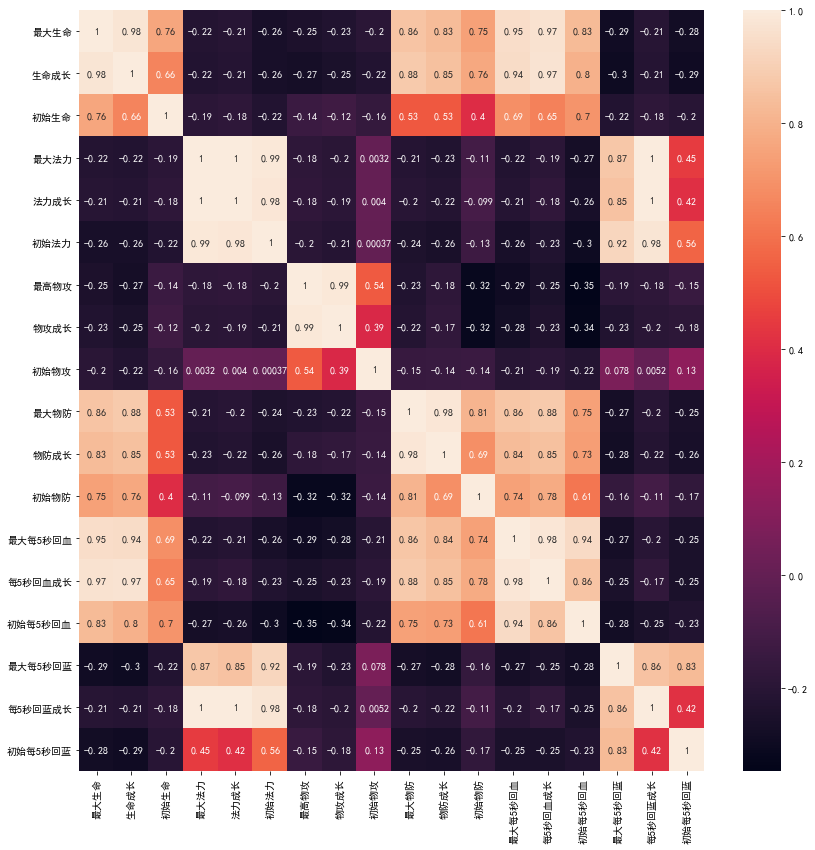

In [37]:
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_original[features]

# 对英雄属性之间的关系进行可视化分析
 
# 设置plt正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
 
# 用热力图呈现特征之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

我们将 18 个英雄属性之间的关系用热力图呈现了出来，中间的数字代表两个属性之间的关系系数，最大值为 1，代表完全正相关，关系系数越大代表相关性越大。

从图中你能看出来“最大生命”“生命成长”和“初始生命”这三个属性的相关性大，我们只需要保留一个属性即可。同理我们也可以对其他相关性大的属性进行筛选，保留一个。 这既是对原有属性进行降维。

4.特征工程

In [38]:
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', 
                   u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_original[features_remain]
data

,最大生命,初始生命,最大法力,最高物攻,初始物攻,最大物防,初始物防,最大每5秒回血,最大每5秒回蓝,初始每5秒回蓝,最大攻速,攻击范围
0,7350,3307,1746,321,159,397,101,98,37,15,28.00%,近战
1,7000,3150,1760,318,164,409,100,92,37,15,14.00%,近战
2,8341,3450,100,301,153,504,125,115,5,5,14.00%,近战
3,8476,3537,1926,273,156,394,109,117,42,17,14.00%,近战
4,7344,3564,0,343,170,390,99,97,0,0,14.00%,近战
...,...,...,...,...,...,...,...,...,...,...,...,...
64,5968,3269,0,427,177,349,89,81,0,0,28.00%,近战
65,6205,3239,1808,385,173,359,86,79,38,16,14.00%,近战
66,6232,3292,1822,388,171,342,85,99,46,19,14.00%,近战
67,6700,3375,1784,328,176,388,107,81,38,16,28.00%,近战


5.数据规范化

我们能看到“最大攻速”这个属性值是百分数，不适合做矩阵运算，因此我们需要将百分数转化为小数。我们也看到“攻击范围”这个字段的取值为远程或者近战，也不适合矩阵运算，我们将取值做个映射，用 1 代表远程，0 代表近战。然后采用 Z-Score 规范化，对特征矩阵进行规范化。

In [39]:
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x:float(x.strip('%'))/100)
data[u'攻击范围'] = data[u'攻击范围'].map({'远程':1,'近战':0})

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()                      #Z-Score规范化数据
data = ss.fit_transform(data)

6.GMM聚类分析

In [41]:
from sklearn.mixture import GaussianMixture
# 构造GMM聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)
# 训练数据
prediction = gmm.predict(data)
print(prediction)

[16  7 11 22  2 27 19 11  4  7 10 25 22 28 29 10  6  4  2 12  9 12 20 12
 12 12 20  0 23  3 28  3  3 23  3  3 23 17 26 18 18 23 23  3 23 18 25 26
 25 23 21  5  8 14 14 16  6  7  1  2  6  8 13 16 15  5  5 24  0]


将分组结果导出：

In [42]:
# 将分组结果输出到CSV文件中
data_original.insert(0, '分组', prediction)
data_original.to_csv('./heros_out.csv', index=False, sep=',',encoding='gb18030')

7.显示聚类后的结果

In [44]:
data_group = pd.read_csv('./heros_out.csv',encoding='gbk')
data_group.sort_values('分组')

,分组,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
68,0,百里守约,5611,185.1,3019,1784,96,440,410,15.860,...,68,2.071,39,38,1.571,16,28.00%,远程,射手,刺客
27,0,成吉思汗,5799,198.0,3027,1742,93,440,394,15.000,...,66,2.071,37,36,1.500,15,42.00%,远程,射手,NaN
58,1,刘备,6900,262.5,3225,1742,93,440,363,14.290,...,79,2.786,40,36,1.500,15,28.00%,远程,战士,NaN
59,2,曹操,7473,286.1,3467,0,0,0,361,13.360,...,101,3.357,54,0,0.000,0,14.00%,近战,战士,NaN
4,2,吕布,7344,270.0,3564,0,0,0,343,12.360,...,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,26,大乔,5399,174.4,2958,1926,104,470,305,9.786,...,69,1.929,42,42,1.786,17,14.00%,近战,辅助,NaN
5,27,亚瑟,8050,316.3,3622,0,0,0,346,13.000,...,106,3.643,55,0,0.000,0,14.00%,近战,战士,坦克
30,28,露娜,6612,256.5,3021,1836,99,450,335,12.290,...,99,3.357,52,39,1.643,16,28.00%,近战,战士,法师
13,28,雅典娜,6264,243.0,2862,1732,93,430,327,11.790,...,83,2.786,44,36,1.500,15,28.00%,近战,战士,坦克


8.聚类结果的评估

聚类和分类不一样，聚类是无监督的学习方式，也就是我们没有实际的结果可以进行比对，所以聚类的结果评估不像分类准确率一样直观，那么有没有聚类结果的评估方式呢？这里我们可以采用 Calinski-Harabaz 指标，代码如下：

In [48]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data, prediction)

21.27001042345619

指标分数越高，代表聚类效果越好，也就是相同类中的差异性小，不同类之间的差异性大。当然具体聚类的结果含义，我们需要人工来分析，也就是当这些数据被分成不同的类别之后，具体每个类表代表的含义。

### 编程要求

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding = 'gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]
 
# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()
 
# 相关性大的属性保留一个，因此可以对属性进行降维
*******begin*********

*******end***********
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
data = ss.fit_transform(data)
# 构造 GMM 聚类
*******begin**********

*******end************
# 训练数据
prediction = gmm.predict(data)
print(prediction)
# 将分组结果输出到 CSV 文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./hero_out.csv', index=False, sep=',',encoding='gb18030')

from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(data, prediction))


### 参考答案

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding = 'gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]
 
# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()
 
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
data = ss.fit_transform(data)
# 构造 GMM 聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)
# 训练数据
prediction = gmm.predict(data)
print(prediction)
# 将分组结果输出到 CSV 文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./hero_out.csv', index=False, sep=',',encoding='gb18030')

from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(data, prediction))
